# 第3章 神经网络入门
本章介绍神经网络的核心组件（层、网络、目标函数和优化器），章末会用三个介绍性的事例使用神经网络解决实际问题：  
将电影评论划分为正面或负面（二分类问题）  
将新闻按主题分类（多分类问题）  
根据房地产数据估算房屋价格（回归问题）  

## 3.1 神经网络剖析
层，多层（网络模型）  
输入数据和相应的目标  
损失函数  
优化器
### 3.1.1 层：深度学习的基础组件

In [3]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(32, input_shape=(784,)))
model.add(layers.Dense(32))

### 3.1.2 模型：层构成的网络
双分支网络（two-branch）  
多头网络（multihead）  
Inception模块  
### 3.1.3 损失函数与优化器：配置学习过程的关键
损失函数（目标函数）：最小化，能衡量当前任务是否已经成功完成。  
优化器：决定如何基于损失函数对网络进行更新。  
对于二分类问题，就可以选用二元交叉熵（binary crossentropy）损失函数；  
对于多分类问题，可以用分类交叉熵（categorical crossentropy）损失函数；  
对于序列数据问题，可以用联结时序分类（CTC）损失函数

## 3.2 Keras简介
特性：  
相同的代码可以在CPU或者GPU上无缝切换运行  
具有用户良好的API，便于快速开发深度学习模型   
内置支持卷积网络，循环网络以及二者任意组合  
支持任意网络架构：多输入或多输出、层共享、模型共享等

### 3.2.1 Keras、Tensorflow、Theano和CNTK
目前Keras有三个后端实现：Tensorflow后端（Google）、Theano后端（蒙特利尔大学）、CNTK（Microsoft）。  
其中在Tensorflow的GPU上运行时叫做NVIDIA CUDA（cuDNN）

### 3.2.2 使用Keras开发：概述

In [9]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(32, activation = 'relu', input_shape=(784,)))
model.add(layers.Dense(10, activation = 'softmax'))

# 下面是用函数式API定义的相同模型
input_tensor = layers.Input(shape = (784, ))
x = layers.Dense(32, activation = 'relu')(input_tensor)
output_tensor = layers.Dense(10, activation = 'softmax')(x)

model = models.Model(inputs = input_tensor, outputs = output_tensor)

In [13]:
from keras import optimizers

model.compile(optimizer = optimizers.RMSprop(lr = 0.001),
             loss = 'mse',
             metrics = ['accuracy'])

In [ ]:
model.fit(input_tensor, target_tensor, batch_size = 128, epochs = 10)

## 3.3 建立深度学习工作站
安装GPU
这里推荐我写的另一篇blog：

## 3.4 电影评论分类：二分类问题
### 3.4.1 IMDB数据集
来自互联网电影数据库50000条严重两极分化的评论。训练和测试各25000条。

In [6]:
# 3-1 加载IMDB数据库
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)
print(train_data[0])
print(train_labels[0])

# 可以迅速把某条评论解码为英文单词
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join(
    [reverse_word_index.get(i - 3, '?') for i in train_data[0]])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
1


### 3.4.2 准备数据
填充列表，使其具有相同的长度（samples, word_indices）  
对列表进行one-hot编码，使其转换为0或1组成的向量

In [7]:
# 3-2 将整数序列编码为二进制矩阵
import numpy as np

def vectorize_sequences(sequences, dimension = 10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

print(x_train[0])
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

[0. 1. 1. ... 0. 0. 0.]


### 3.4.3 构建网络


In [8]:
# 3-3 模型定义
from keras import models 
from keras import layers

# 序列数据
model = models.Sequential()

#使用两个中间层，没吃呢个16个隐藏单元
model.add(layers.Dense(16, activation = 'relu', input_shape = (10000,) ))
model.add(layers.Dense(16, activation = 'relu'))

# 用sigmoid对最后一层激活输出一个0-1范围内概率值
model.add(layers.Dense(1, activation = 'sigmoid'))

在编译器处选择优化器和激活函数，这里使用RMSProp优化器和binary_crossentropy损失函数来配置模型

In [9]:
# 3-4 编译模型
model.compile(optimizer = 'rmsprop',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

In [11]:
# 3-5 配置优化器
from keras import optimizers

model.compile(optimizer = optimizers.RMSprop(lr = 0.001),
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

# 3-6 使用自定义的损失和指标
from keras import losses
from keras import metrics

model.compile(optimizer = optimizers.RMSprop(lr = 0.001),
             loss = losses.binary_crossentropy,
             metrics = [metrics.binary_accuracy])

### 3.4.4 验证你的方法
为了监控训练过程中在未见数据集上的精度，需要将原始训练的数据留出10000个样本作为验证集。

In [12]:
# 3-7 留出验证集
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [13]:
# 3-8 训练模型
model.compile(optimizer = 'rmsprop',
             loss = 'binary_crossentropy',
             metrics = ['acc'])

history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs = 20,
                   batch_size = 512,
                   validation_data = (x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 4s 299us/step - loss: 0.5084 - acc: 0.7813 - val_loss: 0.3797 - val_acc: 0.8684
Epoch 2/20
15000/15000 [==============================] - 3s 217us/step - loss: 0.3004 - acc: 0.9047 - val_loss: 0.3004 - val_acc: 0.8897
Epoch 3/20
15000/15000 [==============================] - 3s 223us/step - loss: 0.2179 - acc: 0.9286 - val_loss: 0.3087 - val_acc: 0.8711
Epoch 4/20
15000/15000 [==============================] - 3s 228us/step - loss: 0.1750 - acc: 0.9438 - val_loss: 0.2840 - val_acc: 0.8832
Epoch 5/20
15000/15000 [==============================] - 4s 235us/step - loss: 0.1427 - acc: 0.9542 - val_loss: 0.2841 - val_acc: 0.8871
Epoch 6/20
15000/15000 [==============================] - 3s 224us/step - loss: 0.1150 - acc: 0.9651 - val_loss: 0.3162 - val_acc: 0.8770
Epoch 7/20
15000/15000 [==============================] - 3s 232us/step - loss: 0.0979 - acc: 0.9707 - val_loss: 0.3128 - 

In [14]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_acc', 'acc', 'val_loss', 'loss'])

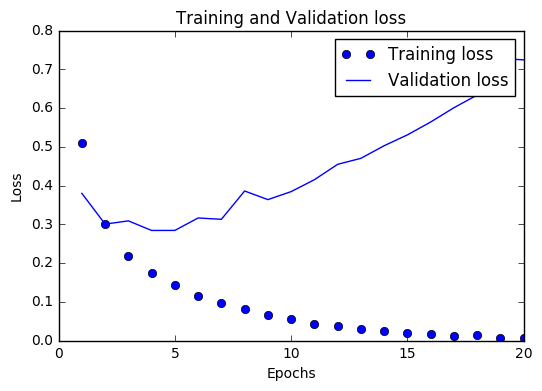

In [20]:
# 3-9 绘制训练损失和验证损失
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


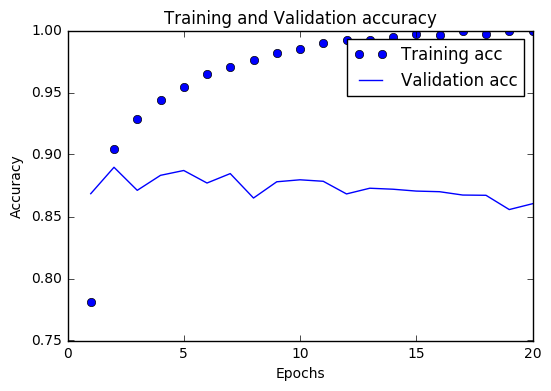

In [21]:
# 3-10 绘制训练精度和验证精度
plt.clf()
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

可以发现在第二轮后，模型在训练数据上精度很高，但是在验证精度上并非如此，此时是过拟合现象（overfit）

In [23]:
# 3-11 从头开始训练一个模型
model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics = ['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)
print(results)

Epoch 1/4
25000/25000 [==============================] - 7s 287us/step - loss: 0.4574 - acc: 0.8247
Epoch 2/4
25000/25000 [==============================] - 4s 157us/step - loss: 0.2641 - acc: 0.9082
Epoch 3/4
25000/25000 [==============================] - 4s 144us/step - loss: 0.2039 - acc: 0.9282
Epoch 4/4
25000/25000 [==============================] - 7s 295us/step
[0.28807684420585633, 0.88504]


### 3.4.5 使用训练好的网络在新数据上生成预测结果


In [24]:
model.predict(x_test)

array([[0.23583308],
       [0.99974436],
       [0.85348594],
       ...,
       [0.12692562],
       [0.06978337],
       [0.6001638 ]], dtype=float32)

### 3.4.6 进一步实验
可以尝试使用一个或者三个隐藏层  
尝试使用更多或者更少的隐藏单元，比如32个、64个  
尝试使用mse损失函数代替binary_crossentropy  
尝试使用tanh激活代替relu

In [28]:
# 使用三个隐藏层
model1 = models.Sequential()
model1.add(layers.Dense(16, activation = 'relu', input_shape=(10000,)))
model1.add(layers.Dense(16, activation='relu'))
model1.add(layers.Dense(16, activation='relu'))
model1.add(layers.Dense(1, activation='sigmoid'))

model1.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics = ['accuracy'])

model1.fit(x_train, y_train, epochs=4, batch_size=512)
results1 = model1.evaluate(x_test, y_test)
print(results1)

# 使用一个隐藏层
model2 = models.Sequential()
model2.add(layers.Dense(16, activation = 'relu', input_shape=(10000,)))
model2.add(layers.Dense(1, activation='sigmoid'))

model2.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics = ['accuracy'])

model2.fit(x_train, y_train, epochs=4, batch_size=512)
results2 = model2.evaluate(x_test, y_test)
print(results2)

Epoch 1/4
25000/25000 [==============================] - 4s 163us/step - loss: 0.4897 - acc: 0.8152
Epoch 2/4
25000/25000 [==============================] - 4s 145us/step - loss: 0.2659 - acc: 0.9089
Epoch 3/4
25000/25000 [==============================] - 4s 145us/step - loss: 0.1989 - acc: 0.9281
Epoch 4/4
25000/25000 [==============================] - 4s 159us/step
[0.32349896079063417, 0.87648]
Epoch 1/4
25000/25000 [==============================] - 4s 164us/step - loss: 0.4463 - acc: 0.8278
Epoch 2/4
25000/25000 [==============================] - 4s 145us/step - loss: 0.2716 - acc: 0.9082
Epoch 3/4
25000/25000 [==============================] - 4s 148us/step - loss: 0.2153 - acc: 0.9263
Epoch 4/4
25000/25000 [==============================] - 4s 159us/step
[0.2889633750629425, 0.88392]


可以看到使用了三个隐藏层过拟合了。

In [29]:
# 使用三个隐藏层
model1 = models.Sequential()
model1.add(layers.Dense(32, activation = 'relu', input_shape=(10000,)))
model1.add(layers.Dense(32, activation='relu'))
model1.add(layers.Dense(1, activation='sigmoid'))

model1.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics = ['accuracy'])

model1.fit(x_train, y_train, epochs=4, batch_size=512)
results1 = model1.evaluate(x_test, y_test)
print(results1)

# 使用一个隐藏层
model2 = models.Sequential()
model2.add(layers.Dense(64, activation = 'relu', input_shape=(10000,)))
model1.add(layers.Dense(64, activation='relu'))
model2.add(layers.Dense(1, activation='sigmoid'))

model2.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics = ['accuracy'])

model2.fit(x_train, y_train, epochs=4, batch_size=512)
results2 = model2.evaluate(x_test, y_test)
print(results2)

Epoch 1/4
25000/25000 [==============================] - 5s 187us/step - loss: 0.4277 - acc: 0.8172
Epoch 2/4
25000/25000 [==============================] - 4s 163us/step - loss: 0.2427 - acc: 0.9098
Epoch 3/4
25000/25000 [==============================] - 4s 160us/step - loss: 0.1884 - acc: 0.9322
Epoch 4/4
25000/25000 [==============================] - 4s 172us/step
[0.3107045688867569, 0.88012]
Epoch 1/4
25000/25000 [==============================] - 5s 215us/step - loss: 0.4135 - acc: 0.8197
Epoch 2/4
25000/25000 [==============================] - 5s 208us/step - loss: 0.2400 - acc: 0.9113
Epoch 3/4
25000/25000 [==============================] - 5s 197us/step - loss: 0.1894 - acc: 0.9300
Epoch 4/4
25000/25000 [==============================] - 5s 213us/step
[0.305362302441597, 0.88064]


In [30]:
model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss='mse',
             metrics = ['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)
print(results)

Epoch 1/4
25000/25000 [==============================] - 4s 166us/step - loss: 0.1443 - acc: 0.8232
Epoch 2/4
25000/25000 [==============================] - 4s 142us/step - loss: 0.0772 - acc: 0.9096
Epoch 3/4
25000/25000 [==============================] - 4s 150us/step - loss: 0.0590 - acc: 0.9298
Epoch 4/4
25000/25000 [==============================] - 4s 165us/step
[0.08538210510015487, 0.88408]


In [31]:
model = models.Sequential()
model.add(layers.Dense(16, activation = 'tanh', input_shape=(10000,)))
model.add(layers.Dense(16, activation='tanh'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics = ['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)
print(results)

Epoch 1/4
25000/25000 [==============================] - 5s 187us/step - loss: 0.4348 - acc: 0.8314
Epoch 2/4
25000/25000 [==============================] - 4s 161us/step - loss: 0.2380 - acc: 0.9133
Epoch 3/4
25000/25000 [==============================] - 4s 154us/step - loss: 0.1798 - acc: 0.9348
Epoch 4/4
25000/25000 [==============================] - 4s 156us/step
[0.3290252224183083, 0.87604]


## 3.5 新闻分类：多分类问题
### 3.5.1 路透社数据集
数据包含许多短新闻及对应的主题。

In [75]:
# 3-12 加载路透社数据集
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

print(len(train_data))
print(len(test_data))

8982
2246


In [76]:
# 3-13 将索引解码为新闻文本
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ''.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

### 3.5.2 准备数据
将测试数据和训练数据向量化

In [77]:
# 3-14 编码数据
import numpy as np

def vetorize_sequences(sequences, dimension = 10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

one-hot 编码

In [82]:
def to_one_hot(labels, dimension = 46):
    results = np.zeros((len(labels), dimension))
    for i,label in enumerate(labels):
        results[i, label] = 1
    return results

# 使用one-hot编码来作为标签列表的分类编码
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

# 使用to_categorical将标签向量化
'''
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
ont_hot_test_labels = to_categorical(test_labels)
'''

'\nfrom keras.utils.np_utils import to_categorical\n\none_hot_train_labels = to_categorical(train_labels)\nont_hot_test_labels = to_categorical(test_labels)\n'

### 3.5.3 构建网络
从imdb的二分类变成现在46分类，每层使用64个单元。

In [67]:
# 3-15 模型定义
from keras import models 
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(46, activation = 'softmax'))

In [68]:
# 3-16 编译模型
model.compile(optimizer = 'rmsprop',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

### 3.5.4 验证你的方法

In [69]:
# 3-17 留出验证集
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [70]:
# 3-18 训练模型
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs = 20,
                   batch_size = 512,
                   validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 3s 385us/step - loss: 2.6455 - acc: 0.4762 - val_loss: 1.7351 - val_acc: 0.6490
Epoch 2/20
7982/7982 [==============================] - 2s 240us/step - loss: 1.4111 - acc: 0.7086 - val_loss: 1.2963 - val_acc: 0.7260
Epoch 3/20
7982/7982 [==============================] - 2s 219us/step - loss: 1.0418 - acc: 0.7811 - val_loss: 1.1148 - val_acc: 0.7620
Epoch 4/20
7982/7982 [==============================] - 2s 234us/step - loss: 0.8233 - acc: 0.8234 - val_loss: 1.0309 - val_acc: 0.7700
Epoch 5/20
7982/7982 [==============================] - 2s 219us/step - loss: 0.6585 - acc: 0.8588 - val_loss: 0.9651 - val_acc: 0.7870
Epoch 6/20
7982/7982 [==============================] - 2s 217us/step - loss: 0.5268 - acc: 0.8920 - val_loss: 0.9086 - val_acc: 0.8130
Epoch 7/20
7982/7982 [==============================] - 2s 231us/step - loss: 0.4252 - acc: 0.9114 - val_loss: 0.8955 - val_acc: 0.8190


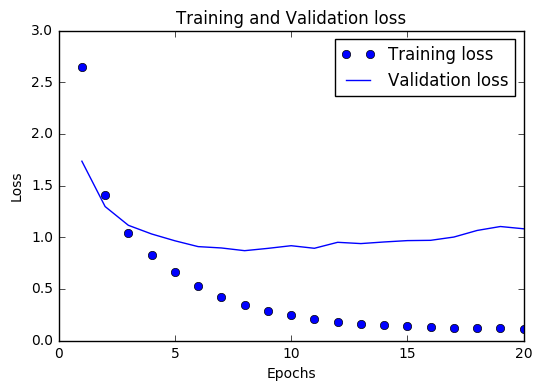

In [71]:
# 3-19 绘制训练损失和验证损失
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

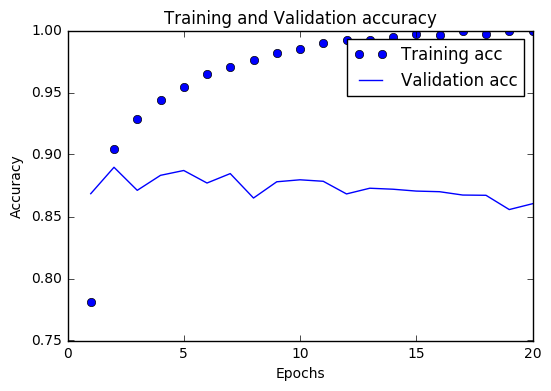

In [73]:
# 3-20 绘制训练精度和验证精度
import matplotlib.pyplot as plt

loss = history.history['acc']
val_loss = history.history['val_acc']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [83]:
# 3-21 从头开始训练一个模型
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer = 'rmsprop',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

model.fit(partial_x_train,
         partial_y_train,
         epochs=9,
         batch_size=512,
         validation_data=(x_val, y_val))

results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 3s 372us/step - loss: 2.5645 - acc: 0.5575 - val_loss: 1.6650 - val_acc: 0.6570
Epoch 2/9
7982/7982 [==============================] - 2s 223us/step - loss: 1.3612 - acc: 0.7180 - val_loss: 1.2470 - val_acc: 0.7130
Epoch 3/9
7982/7982 [==============================] - 2s 222us/step - loss: 1.0080 - acc: 0.7845 - val_loss: 1.0986 - val_acc: 0.7700
Epoch 4/9
7982/7982 [==============================] - 2s 227us/step - loss: 0.7974 - acc: 0.8282 - val_loss: 1.0051 - val_acc: 0.7840
Epoch 5/9
7982/7982 [==============================] - 2s 222us/step - loss: 0.6410 - acc: 0.8612 - val_loss: 0.9686 - val_acc: 0.7870
Epoch 6/9
7982/7982 [==============================] - 2s 225us/step - loss: 0.5116 - acc: 0.8903 - val_loss: 0.9069 - val_acc: 0.8070
Epoch 7/9
7982/7982 [==============================] - 2s 227us/step - loss: 0.4150 - acc: 0.9127 - val_loss: 0.8806 - val_acc: 0.8200
Epoch 8

### 3.5.5 在新数据上生成预测结果
predict（）

In [85]:
# 3-22 在新数据上生成预测结果
predictions = model.predict(x_test)
print(predictions[0].shape)
print(np.sum(predictions[0]))
print(np.argmax(predictions[0]))

(46,)
0.9999998
3


### 3.5.6 处理标签和损失的另一种方法

In [87]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [88]:
model.compile(optimizer='rmsprop',
             loss = 'sparse_categorical_crossentropy',
             metrics=['acc'])

### 3.5.7 中间层维度足够大的重要性

In [91]:
# 3-23 具有信息瓶颈足够大的重要性，中间层的单元一定要大于分类数
model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation = 'relu'))
model.add(layers.Dense(46, activation = 'softmax'))

model.compile(optimizer = 'rmsprop',
             loss = 'categorical_crossentropy',
             metrics=['accuracy'])

model.fit(partial_x_train,
         partial_y_train,
         epochs = 20,
         batch_size = 128,
         validation_data = (x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 4s 441us/step - loss: 3.4782 - acc: 0.3332 - val_loss: 3.1633 - val_acc: 0.4410
Epoch 2/20
7982/7982 [==============================] - 3s 331us/step - loss: 2.9968 - acc: 0.2744 - val_loss: 2.8621 - val_acc: 0.2320
Epoch 3/20
7982/7982 [==============================] - 3s 314us/step - loss: 2.7014 - acc: 0.2202 - val_loss: 2.5768 - val_acc: 0.2260
Epoch 4/20
7982/7982 [==============================] - 3s 328us/step - loss: 2.3254 - acc: 0.2472 - val_loss: 2.1544 - val_acc: 0.2540
Epoch 5/20
7982/7982 [==============================] - 2s 310us/step - loss: 1.9196 - acc: 0.3473 - val_loss: 1.8863 - val_acc: 0.4220
Epoch 6/20
7982/7982 [==============================] - 3s 314us/step - loss: 1.6662 - acc: 0.5342 - val_loss: 1.6426 - val_acc: 0.6290
Epoch 7/20
7982/7982 [==============================] - 3s 324us/step - loss: 1.3427 - acc: 0.6537 - val_loss: 1.4260 - val_acc: 0.6510


### 3.5.8 进一步实验
尝试使用更多或者更少的隐藏单元  
使用一个或者三个隐藏层

### 3.5.9 小结
对N个类别的数据分类，网络最后一层应该是大小为N的Dense层  
对于多标签问题，最后一层应该用softmax激活  
使用分类交叉熵categorical_crossentropy  
处理多分类问题的两种方法：    
one-hot编码，categorical_crossentropy作为损失函数   
将标签编码为整数，使用sparse_categorical_crossentropy为损失函数   
如果有许多类别，应该避免使用太小的中间层，以免造成信息瓶颈

## 3.6 预测房价：回归问题
预测的是连续值，而不是离散的标签。

### 3.6.1 波士顿房价数据集
输入的数据每个特征是有不同的取值范围。

In [113]:
# 3-24 加载波士顿房价数据
from keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

print(train_data.shape)
print(test_data.shape)
print(train_targets)

(404, 13)
(102, 13)
[15.2 42.3 50.  21.1 17.7 18.5 11.3 15.6 15.6 14.4 12.1 17.9 23.1 19.9
 15.7  8.8 50.  22.5 24.1 27.5 10.9 30.8 32.9 24.  18.5 13.3 22.9 34.7
 16.6 17.5 22.3 16.1 14.9 23.1 34.9 25.  13.9 13.1 20.4 20.  15.2 24.7
 22.2 16.7 12.7 15.6 18.4 21.  30.1 15.1 18.7  9.6 31.5 24.8 19.1 22.
 14.5 11.  32.  29.4 20.3 24.4 14.6 19.5 14.1 14.3 15.6 10.5  6.3 19.3
 19.3 13.4 36.4 17.8 13.5 16.5  8.3 14.3 16.  13.4 28.6 43.5 20.2 22.
 23.  20.7 12.5 48.5 14.6 13.4 23.7 50.  21.7 39.8 38.7 22.2 34.9 22.5
 31.1 28.7 46.  41.7 21.  26.6 15.  24.4 13.3 21.2 11.7 21.7 19.4 50.
 22.8 19.7 24.7 36.2 14.2 18.9 18.3 20.6 24.6 18.2  8.7 44.  10.4 13.2
 21.2 37.  30.7 22.9 20.  19.3 31.7 32.  23.1 18.8 10.9 50.  19.6  5.
 14.4 19.8 13.8 19.6 23.9 24.5 25.  19.9 17.2 24.6 13.5 26.6 21.4 11.9
 22.6 19.6  8.5 23.7 23.1 22.4 20.5 23.6 18.4 35.2 23.1 27.9 20.6 23.7
 28.  13.6 27.1 23.6 20.6 18.2 21.7 17.1  8.4 25.3 13.8 22.2 18.4 20.7
 31.6 30.5 20.3  8.8 19.2 19.4 23.1 23.  14.8 48.8 22.6 33.4 

### 3.6.2 准备数据
对数据特征标准化（normalize），对输入数据减去平均值，再除以标准差。

In [114]:
# 3-25 准备数据
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /=std

test_data -= mean
test_data /= std

### 3.6.3 构建网络
由于数据样本很小，使用一个小网络，减少过拟合程度。

In [101]:
from keras import models
from keras import layers

def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mse'])
    return model

### 3.6.4 利用K折验证来验证你的方法
K折交叉验证：份数据集分成K份，每次在K-1个模型上训练

In [103]:
# 3-27 K折验证
import numpy as np

k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []

for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    
    # concatenate()拼接数组
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis = 0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis = 0)
    
    model = build_model()
    model.fit(partial_train_data, partial_train_targets, 
              epochs=num_epochs, batch_size=1, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [105]:
print(all_scores)
np.mean(all_scores)

[7.662239915073508, 20.2562838072824, 13.579548505273197, 11.053767351230773]


13.13795989471497

In [120]:
# 3-28 保存每折的验证结果
import numpy as np

k = 4
num_val_samples = len(train_data) // k
num_epochs = 500
all_mae_histories = []

for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    
    # concatenate()拼接数组
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis = 0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis = 0)
    
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data = (val_data, val_targets),
                        epochs=num_epochs, batch_size=1, verbose=0)
    mae_history = history.history['val_loss']
    all_mae_histories.append(mae_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [123]:
# 3-29 计算所有轮次中的K折验证分数平均值
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

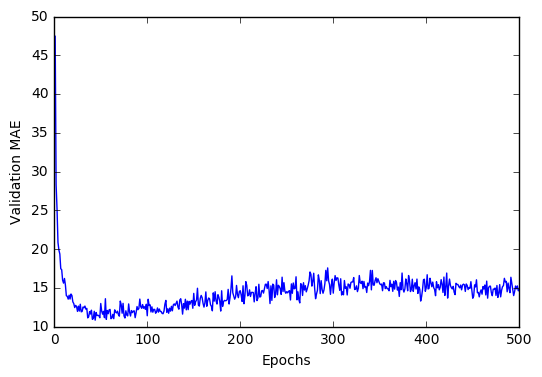

In [124]:
# 3-30 绘制验证分数
import matplotlib.pyplot as plt
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

因为纵轴范围太大，删除前10个数据点，重新绘制

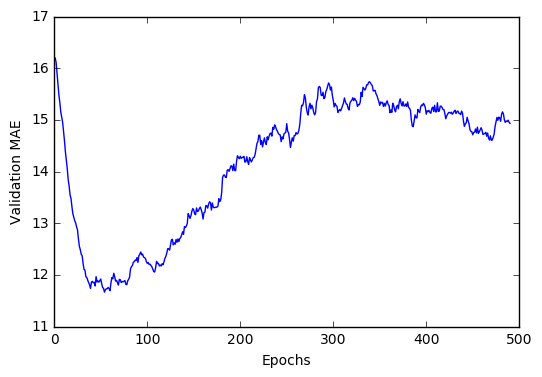

In [125]:
def smooth_curve(points, factor = 0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

使用最后训练的模型参数，再在所有数据上训练处最终的生产模型，观察在测试集上的性能。

In [127]:
# 3-32 训练最终模型
model = build_model()
model.fit(train_data, train_targets, epochs = 80, batch_size = 16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)
print(test_mae_score)

102/102 [==============================] - 1s 5ms/step
19.081563463398055
